In [1]:
import numpy as np
import matplotlib.pyplot
import plotly.express as px
import pandas as pd

In [2]:
pd.set_option('display.max_columns' , None)

In [3]:
df = pd.read_csv('titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [8]:
def age_roundoff(age):
    try:
        return int(age)
    except:
        return 0
df.age = df.age.apply(age_roundoff)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Find first class passenger

In [9]:
First_class =df['class']=='First'
df[First_class]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


# Find second class passenger

In [10]:
second_class=df['class']=='Second'
df[second_class]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
15,1,2,female,55,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
17,1,2,male,0,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
20,0,2,male,35,0,0,26.0000,S,Second,man,True,NaN,Southampton,no,True
21,1,2,male,34,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,1,2,female,27,1,0,13.8583,C,Second,woman,False,NaN,Cherbourg,yes,False
874,1,2,female,28,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
880,1,2,female,25,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
883,0,2,male,28,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True


# Find Third class passenger

In [11]:
third_class=df['class']=='Third'
df[third_class]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,3,female,22,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
884,0,3,male,25,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
888,0,3,female,0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


# print males passenger

In [12]:
Mens=df['sex']=='male'
df[Mens]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# print total no. of male candidate

In [13]:
Mens.sum()

577

# print female passenger

In [14]:
womens=df['sex']=='female'
df[womens]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


# print total no. of female candidate

In [15]:
womens.sum()

314

# print the data of passenger whose age is less than 20

In [16]:
pass_age=df['age']<20
df[pass_age]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
877,0,3,male,19,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


# print the data of passenger whose age is greater than 20

In [17]:
pass_Age = df['age']>20
df[pass_Age]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Print the data of passenger whose age is less that 20 and  belong to first class

In [18]:
# here first_class is a variable in which first class passenger are stored and in pass_age data of passenger whose age is less than 20
df[First_class & pass_age] # by using and(&) operator we compare to variabe

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
27,0,1,male,19,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,0,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
55,1,1,male,0,0,0,35.5000,S,First,man,True,C,Southampton,yes,True
64,0,1,male,0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
136,1,1,female,19,0,2,26.2833,S,First,woman,False,D,Southampton,yes,False
166,1,1,female,0,0,1,55.0000,S,First,woman,False,E,Southampton,yes,False
168,0,1,male,0,0,0,25.9250,S,First,man,True,NaN,Southampton,no,True
185,0,1,male,0,0,0,50.0000,S,First,man,True,A,Southampton,no,True
256,1,1,female,0,0,0,79.2000,C,First,woman,False,NaN,Cherbourg,yes,True
270,0,1,male,0,0,0,31.0000,S,First,man,True,NaN,Southampton,no,True


# print the data of same town in a single town and perform aggregation function on it(like : sum,max,min,mean,std,count)

In [19]:
df.groupby('embark_town').sum()

C:\Users\anuku\AppData\Local\Temp\ipykernel_11388\2699798323.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('embark_town').sum()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
embark_town,,,,,,,,
Cherbourg,93,317,4001,65,61,10072.2962,90,85
Queenstown,30,224,785,33,13,1022.2543,37,57
Southampton,217,1514,16305,368,266,17439.3988,410,393


In [20]:
df.groupby('class').sum()

C:\Users\anuku\AppData\Local\Temp\ipykernel_11388\4067978590.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('class').sum()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,136,216,7110,90,77,18177.4125,119,109
Second,87,368,5165,74,70,3801.8417,99,104
Third,119,1473,8916,302,193,6714.6951,319,324


In [21]:
df.groupby('sex').sum()

C:\Users\anuku\AppData\Local\Temp\ipykernel_11388\64057823.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('sex').sum()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,233,678,7283,218,204,13966.6628,0,126
male,109,1379,13908,248,136,14727.2865,537,411


<AxesSubplot: title={'center': 'survived'}, xlabel='sex', ylabel='no. of people'>

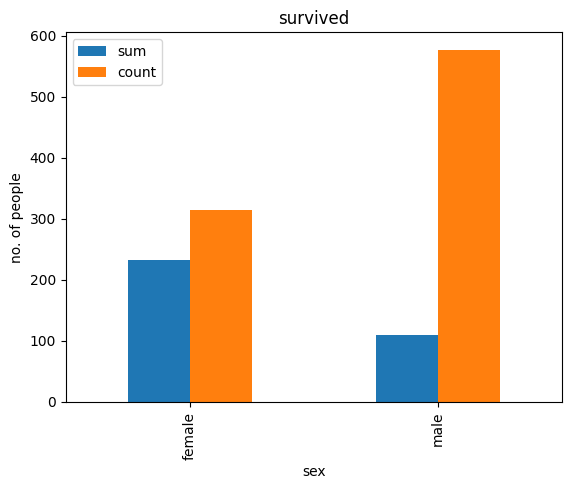

In [22]:
df.groupby('sex')['survived'].agg(['sum','count']).plot(title='survived',kind='bar',ylabel='no. of people')

<AxesSubplot: title={'center': 'Survived People'}, xlabel='class'>

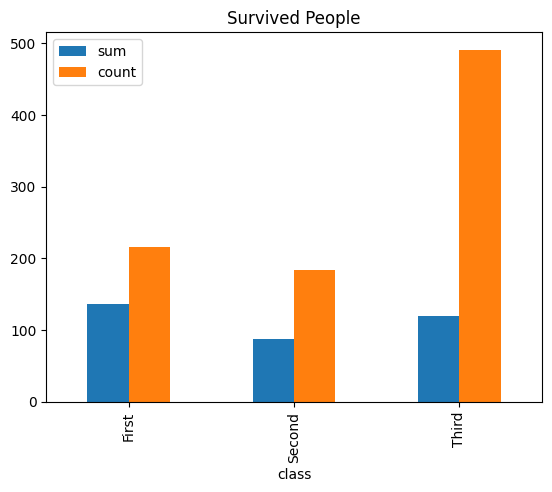

In [23]:
df.groupby('class')['survived'].agg(['sum','count']).plot(title='Survived People',kind='bar')

In [24]:
df.groupby('embark_town').sum()

C:\Users\anuku\AppData\Local\Temp\ipykernel_11388\2699798323.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('embark_town').sum()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
embark_town,,,,,,,,
Cherbourg,93,317,4001,65,61,10072.2962,90,85
Queenstown,30,224,785,33,13,1022.2543,37,57
Southampton,217,1514,16305,368,266,17439.3988,410,393


In [25]:
df.groupby('embark_town')['survived'].agg(['sum','count','mean','std'])

,sum,count,mean,std
embark_town,,,,
Cherbourg,93,168,0.553571,0.498608
Queenstown,30,77,0.389610,0.490860
Southampton,217,644,0.336957,0.473037


In [26]:
df.groupby('embark_town')['age'].mean()

embark_town
Cherbourg      23.815476
Queenstown     10.194805
Southampton    25.318323
Name: age, dtype: float64

In [27]:
df.groupby('embark_town')['survived'].sum()

embark_town
Cherbourg       93
Queenstown      30
Southampton    217
Name: survived, dtype: int64

In [28]:
df.style.background_gradient('Spectral')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.250000,S,Third,man,True,nan,Southampton,no,False
1,1,1,female,38,1,0,71.283300,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.925000,S,Third,woman,False,nan,Southampton,yes,True
3,1,1,female,35,1,0,53.100000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.050000,S,Third,man,True,nan,Southampton,no,True
5,0,3,male,0,0,0,8.458300,Q,Third,man,True,nan,Queenstown,no,True
6,0,1,male,54,0,0,51.862500,S,First,man,True,E,Southampton,no,True
7,0,3,male,2,3,1,21.075000,S,Third,child,False,nan,Southampton,no,False
8,1,3,female,27,0,2,11.133300,S,Third,woman,False,nan,Southampton,yes,False
9,1,2,female,14,1,0,30.070800,C,Second,child,False,nan,Cherbourg,yes,False
